In [2]:
import pandas as pd
import numpy as np

import glob
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyBboxPatch
import numpy as np

import matplotlib.pyplot as plt

from modules.utilities import *
from modules.constants import *

plt.rcParams.update(mpl_params)
TOPIC_DIR = "./Outputs/BERTopic/Topics"

In [3]:
names = []
values = []

for topic_file in glob.glob(os.path.join(TOPIC_DIR, "*.csv")):
    if "-1" not in topic_file:
        topic_name = os.path.basename(topic_file).replace(".csv", "")
        df = pd.read_csv(topic_file)
        count = len(df)
        names.append(topic_map[topic_name])
        values.append(count)

summary_df = pd.DataFrame({
    "Topic": names,
    "Count": values
})

summary_df["Parcent"] = (summary_df["Count"] / (summary_df["Count"].sum()+101)) * 100
summary_df = summary_df.sort_values("Count", ascending=False)

names = summary_df["Topic"].values
values = summary_df["Count"].values
percentages = summary_df["Parcent"].values

In [4]:
summary_df

,Topic,Count,Parcent
26,CI/CD,96,7.862408
11,Transpiler Benchmarking,56,4.586405
23,Rendering and Data Loading,51,4.176904
6,Timeout and Concurrency,43,3.521704
21,Sequence Data Processing,40,3.276003
31,Join Query,35,2.866503
22,Dependency Management,32,2.620803
24,Network Call Optimization,32,2.620803
37,Performance Benchmarking,30,2.457002
47,Memory Leak,28,2.293202


In [5]:
summary_df["Count"].sum()

np.int64(1120)

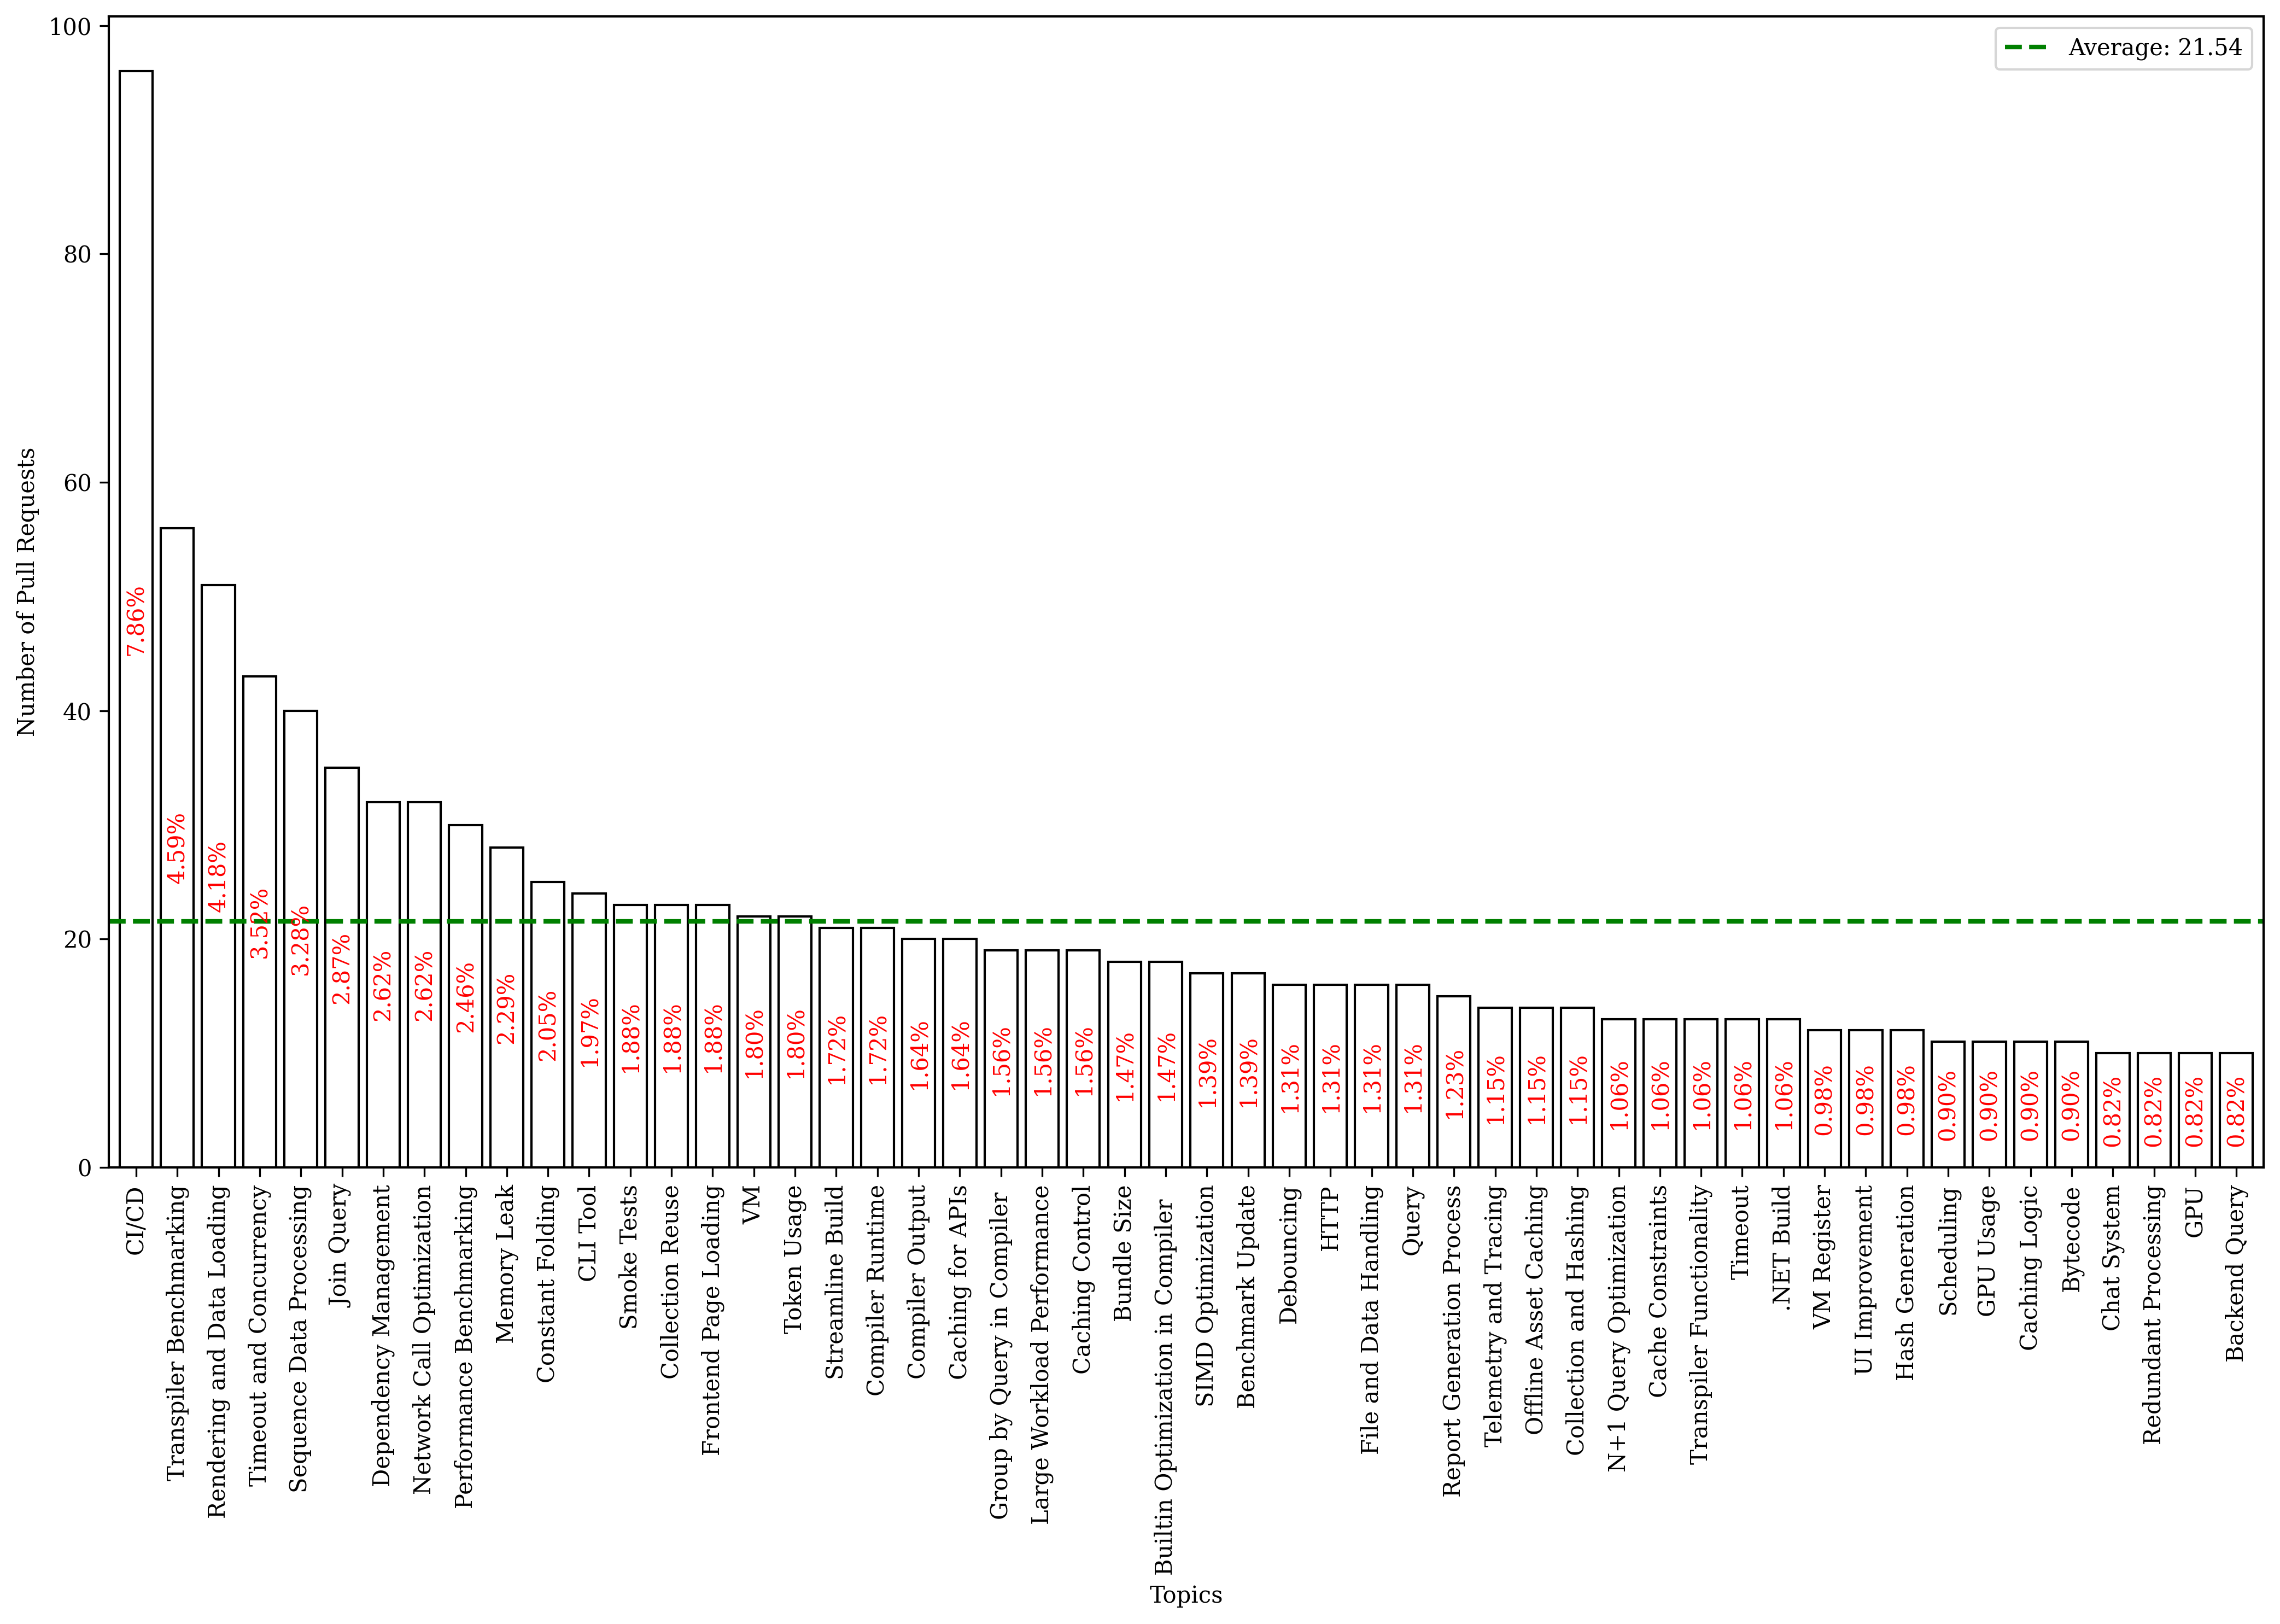

In [6]:
avg_value = np.mean(values)

fig, ax = plt.subplots(figsize=(14, 10))
bars = ax.bar(names, values, color="white", edgecolor="black")

# Add percentage text in the middle of each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height/2.,
            f'{percentage:.2f}%',
            ha='center', va='center', color="red", rotation=90)

ax.axhline(avg_value, color="green", linestyle="--", linewidth=2, label=f"Average: {avg_value:.2f}")
ax.set_ylabel("Number of Pull Requests")
ax.set_xlabel("Topics")
ax.legend()

plt.xticks(rotation=90)
plt.margins(x=0.005, tight=True)
plt.tight_layout()
plt.savefig("./Outputs/Figures/RQ1_Topic_Distribution.pdf", dpi=300, format='pdf', bbox_inches='tight')
plt.show()

In [7]:
topics = {}
for topic_file in glob.glob(os.path.join(TOPIC_DIR, "*.csv")):
    if "-1" not in topic_file:
        topic_name = os.path.basename(topic_file).replace(".csv", "")
        df = pd.read_csv(topic_file)
        topics[topic_name] = df
        
categories = {}
for category, topic_list in category_map.items():
    pr_count = 0
    for topic in topic_list:
        df = pd.read_csv(os.path.join(TOPIC_DIR, topic + ".csv"))
        pr_count += len(df)
    categories[category] = pr_count
    

category_df = pd.DataFrame({
    "Category": list(categories.keys()),
    "Count": list(categories.values())
})
category_df["Percent"] = (category_df["Count"] / category_df["Count"].sum()) * 100
category_df = category_df.sort_values("Count", ascending=False)
category_df

,Category,Count,Percent
1,Low-level,257,22.946429
0,Development,222,19.821429
2,UI,136,12.142857
4,Algorithmic,119,10.625000
6,Networking,96,8.571429
3,Caching,87,7.767857
5,Query,61,5.446429
7,Analytics,61,5.446429
8,Hardware,49,4.375000
9,AI,32,2.857143


In [8]:
categories.keys()

dict_keys(['Development', 'Low-level', 'UI', 'Caching', 'Algorithmic', 'Query', 'Networking', 'Analytics', 'Hardware', 'AI'])

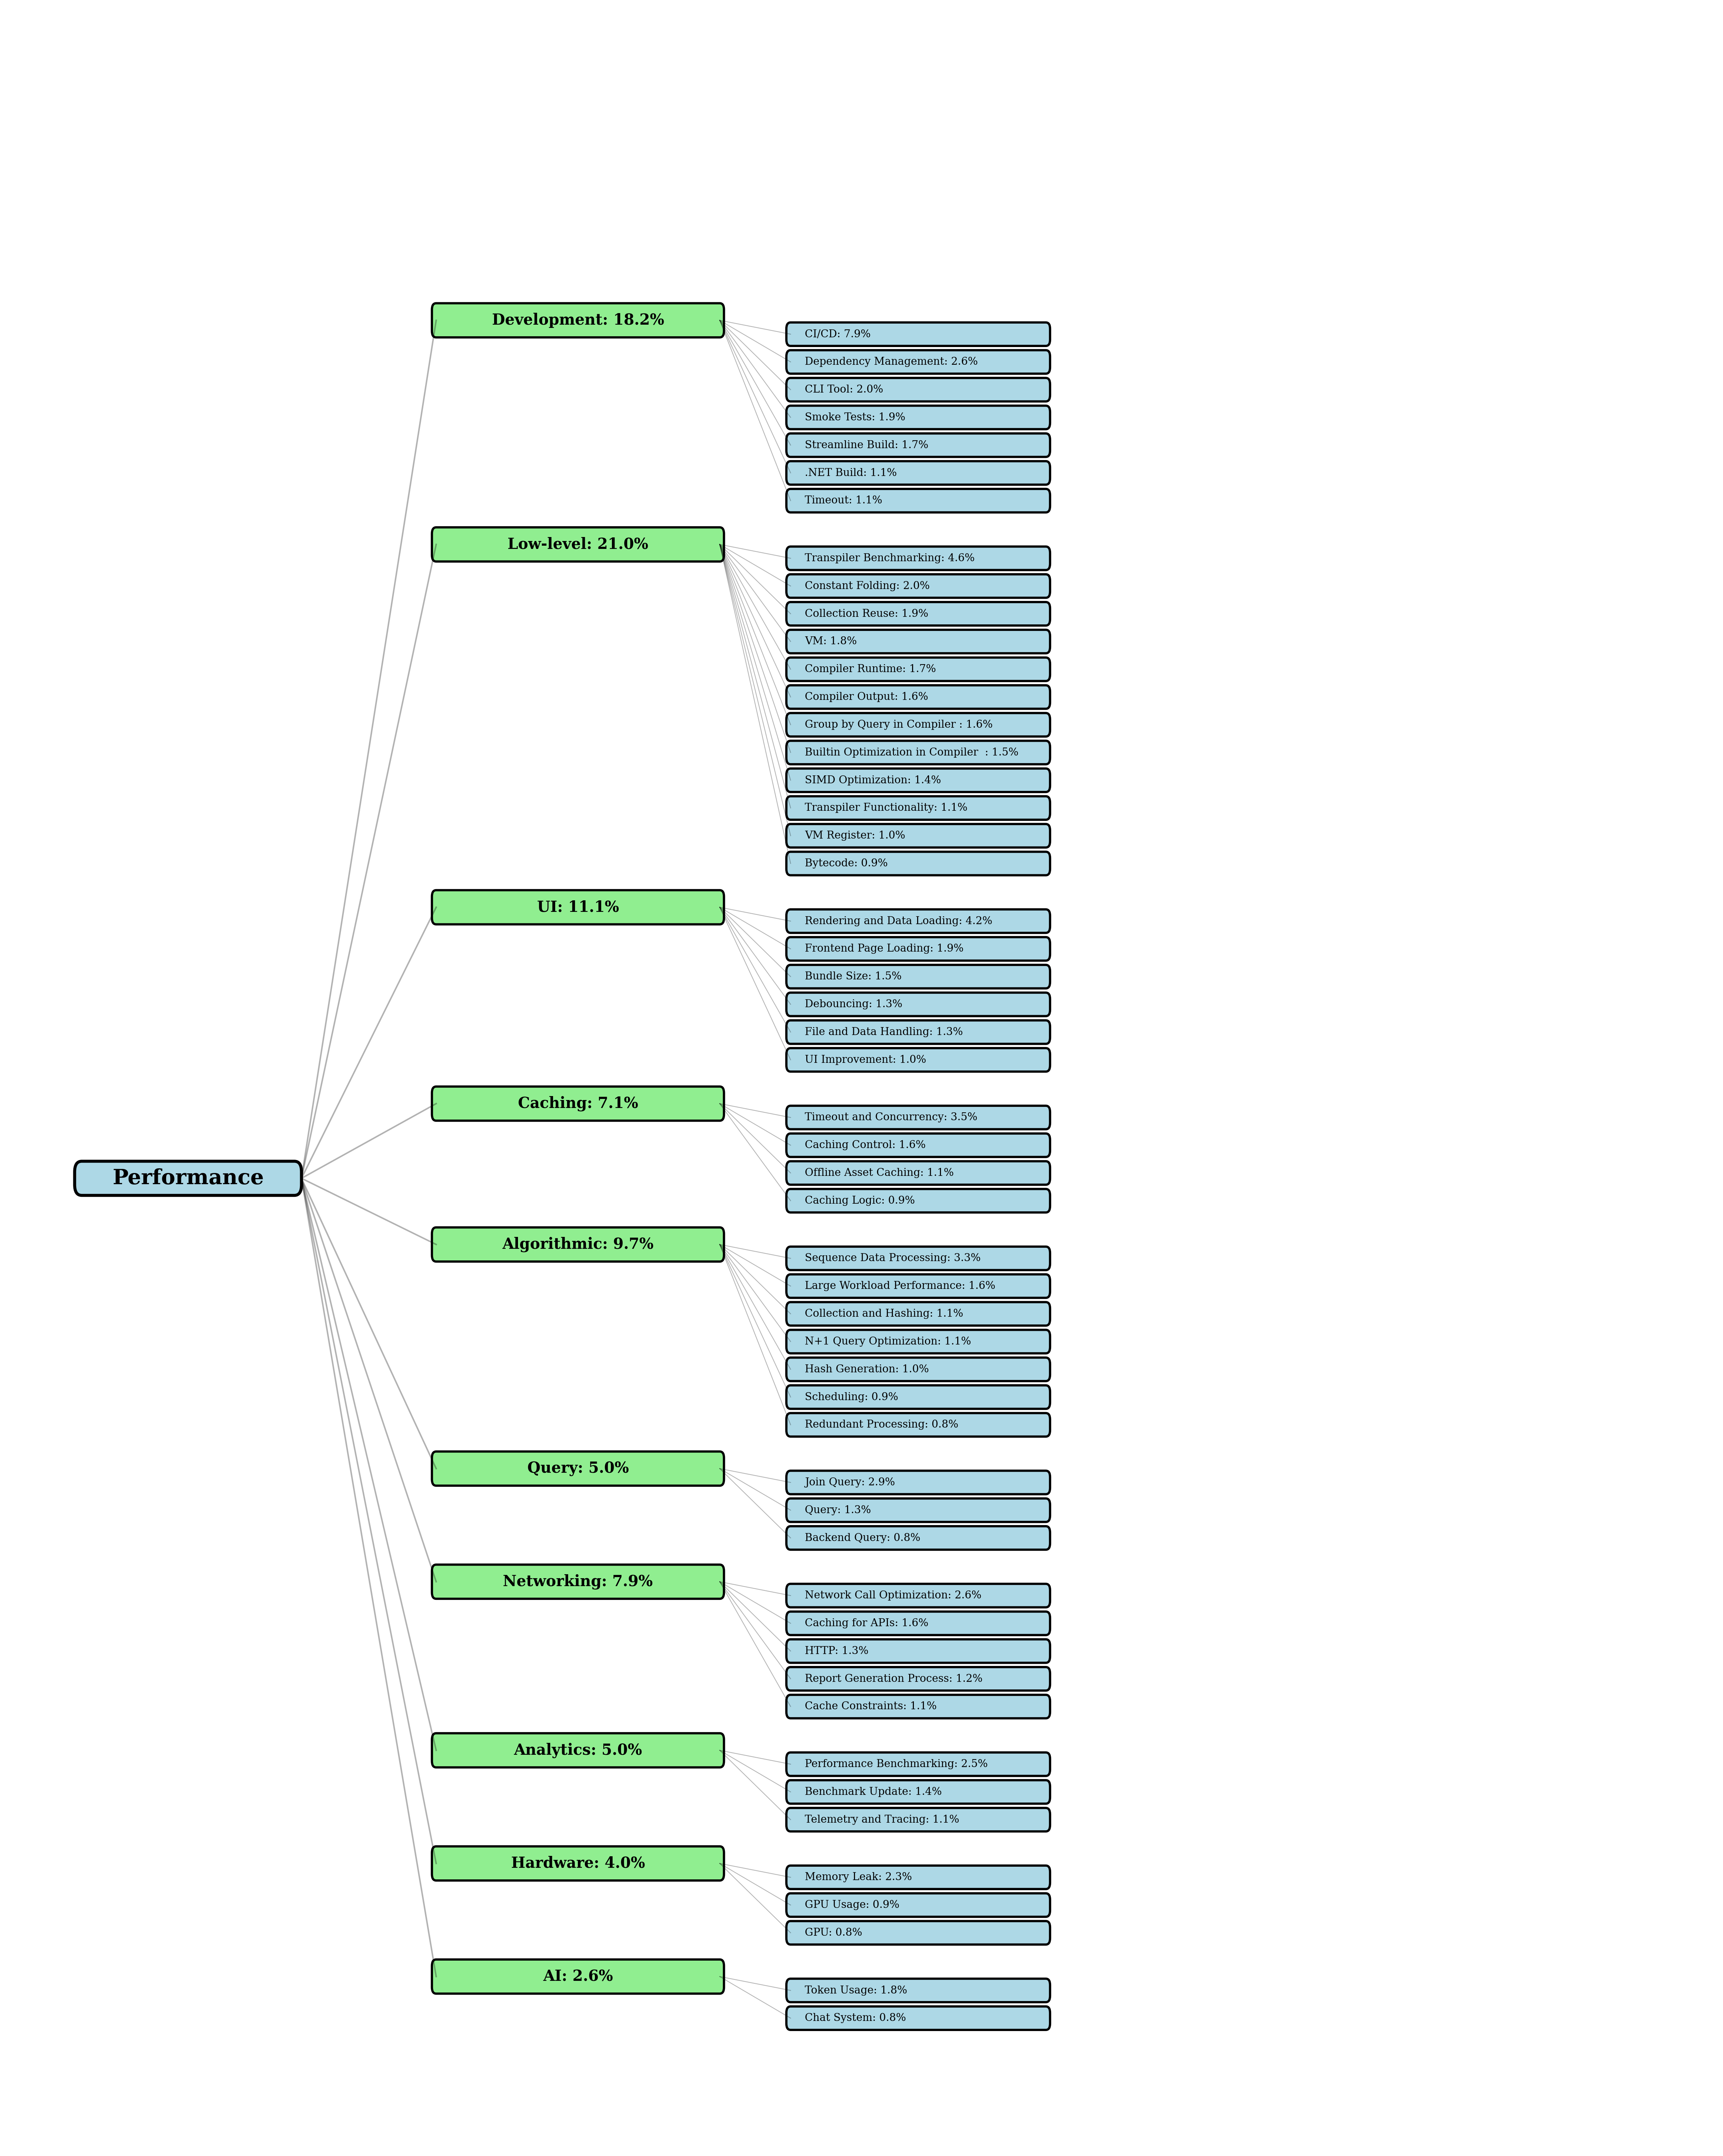

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# =========================
# FIGURE SETUP
# =========================
fig, ax = plt.subplots(figsize=(16, 20))
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# # =========================
# # TITLE
# # =========================
# ax.text(
#     6, 9.5,
#     'Performance Optimization Hierarchy',
#     ha='center',
#     va='center',
#     fontsize=18,
#     fontweight='bold'
# )

# =========================
# ROOT NODE
# =========================
root_box = FancyBboxPatch(
    (0.5, 4.5),
    1.5,
    0.06,
    boxstyle="round,pad=0.05",
    edgecolor='black',
    facecolor='lightblue',
    linewidth=2
)
ax.add_patch(root_box)

ax.text(
    1.25, 4.53,
    'Performance',
    ha='center',
    va='center',
    fontsize=14,
    fontweight='bold'
)

# =========================
# DATA
# =========================
topic_percentages = dict(
    zip(summary_df['Topic'], summary_df['Parcent'])
)

# =========================
# LAYOUT CONSTANTS
# =========================
topic_spacing = 0.13
topic_box_height = 0.05

category_box_height = 0.1
category_topic_gap = 0.04
category_padding = 0.0

cat_x = 3.0
topic_x = 5.5

# =========================
# CALCULATE CATEGORY POSITIONS
# =========================
current_y = 8.5
category_positions = {}

for category, topics in category_map.items():
    n_topics = len(topics)

    required_height = (
        n_topics * topic_spacing
        + category_box_height
        + category_topic_gap
        + category_padding
    )

    category_positions[category] = current_y
    current_y -= required_height

# =========================
# DRAW CATEGORIES AND TOPICS
# =========================
for category, topics in category_map.items():
    cat_y = category_positions[category]

    # ---- Category Box ----
    cat_box = FancyBboxPatch(
        (cat_x, cat_y),
        2,
        category_box_height,
        boxstyle="round,pad=0.03",
        edgecolor='black',
        facecolor='lightgreen',
        linewidth=1.5
    )
    ax.add_patch(cat_box)

    ax.text(
        cat_x + 1.0,
        cat_y + category_box_height / 2,
        category + ": " + f"{categories[category]/(sum(categories.values())+101)*100:.1f}%",
        ha='center',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

    # ---- Root → Category Connector ----
    ax.plot(
        [2.05, cat_x],
        [4.53, cat_y + category_box_height / 2],
        'k-',
        linewidth=1,
        alpha=0.3
    )

    # ---- Topics ----
    topic_start_y = cat_y - category_topic_gap

    for j, topic_key in enumerate(topics):
        topic_name = topic_map[topic_key]
        percentage = topic_percentages.get(topic_name, 0)

        topic_y = topic_start_y - j * topic_spacing

        topic_box = FancyBboxPatch(
            (topic_x, topic_y),
            1.8,
            topic_box_height,
            boxstyle="round,pad=0.03",
            edgecolor='black',
            facecolor='lightblue',
            linewidth=1.5
        )
        ax.add_patch(topic_box)

        # ---- Category → Topic Connector ----
        ax.plot(
            [cat_x + 2.0, topic_x],
            [cat_y + category_box_height / 2,
             topic_y + topic_box_height / 2],
            'k-',
            linewidth=0.5,
            alpha=0.3
        )

        # ---- Topic Label ----
        ax.text(
            topic_x + 0.1,
            topic_y + topic_box_height / 2,
            f'{topic_name}: {percentage:.1f}%',
            ha='left',
            va='center',
            fontsize=7
        )

# =========================
# FINALIZE
# =========================
plt.tight_layout()
plt.savefig("./Outputs/Figures/RQ1_Performance_Optimization_Hierarchy.pdf", dpi=300, format='pdf', bbox_inches='tight')
plt.show()


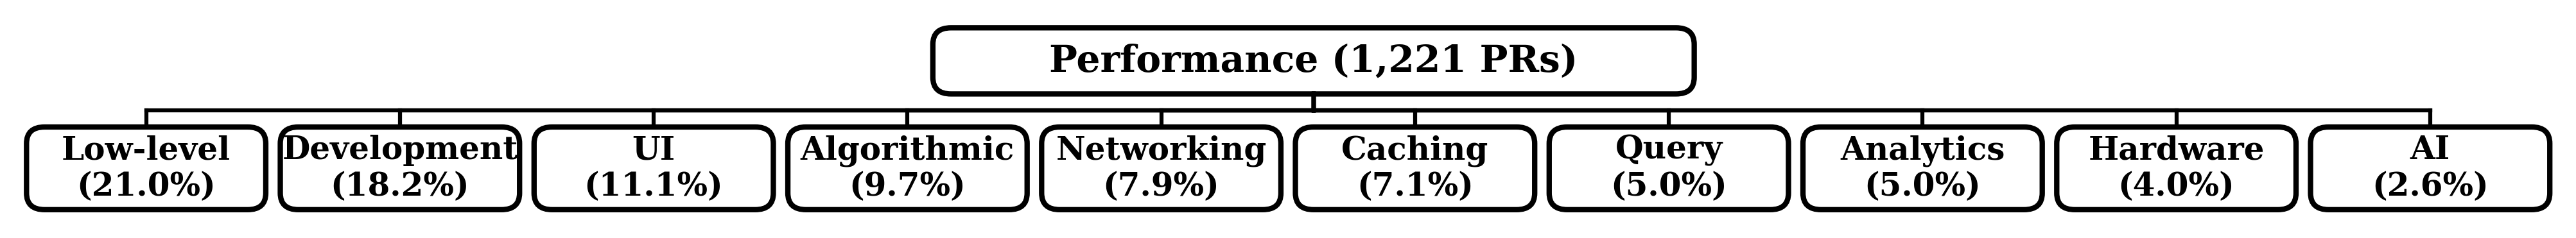

In [74]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import numpy as np

# =========================
# FIGURE SETUP
# =========================
fig, ax = plt.subplots(figsize=(17, 1.35))

ax.axis('off')

# =========================
# ROOT NODE - Performance PRs
# =========================
total_prs = sum(categories.values()) + 101 # 101 outliers

root_box = FancyBboxPatch(
    (9, 0.85),
    2,
    0.1,
    boxstyle="round,pad=0.05",
    edgecolor='black',
    facecolor='white',
    linewidth=2
)
ax.add_patch(root_box)

ax.text(
    10, .9,
    f'Performance ({total_prs:,} PRs)',
    ha='center',
    va='center',
    fontsize=14,
    fontweight='bold'
)

# =========================
# CATEGORY LEVEL
# =========================
sorted_categories = sorted(categories.items(), key=lambda x: x[1], reverse=True)
n_categories = len(sorted_categories)

# Layout for categories (arrange in one row)
category_width = 0.56
category_height = 0.15
x_spacing = 0.7

category_positions = {}

# Calculate starting x to center all categories
total_width = n_categories * x_spacing
start_x = (20 - total_width) / 2
cat_y = 0.5

for idx, (category, count) in enumerate(sorted_categories):
    cat_x = start_x + idx * x_spacing
    
    category_positions[category] = (cat_x, cat_y)
    
    # Draw category box
    percentage = (count / total_prs) * 100
    
    cat_box = FancyBboxPatch(
        (cat_x, cat_y),
        category_width,
        category_height,
        boxstyle="round,pad=0.05",
        edgecolor='black',
        facecolor='white',
        linewidth=2
    )
    ax.add_patch(cat_box)
    
    # Category text
    ax.text(
        cat_x + category_width / 2,
        cat_y + category_height / 2,
        f'{category}\n({percentage:.1f}%)',
        ha='center',
        va='center',
        fontsize=12,
        fontweight='bold'
    )
    
    # Draw square connector from root to category
    root_center_x = 10
    root_bottom_y = 0.8
    cat_center_x = cat_x + category_width / 2
    cat_top_y = cat_y + category_height + 0.05
    
    # Vertical line down from root, then horizontal to category x, then vertical to category
    mid_y = (root_bottom_y + cat_top_y) / 2
    
    ax.plot([root_center_x, root_center_x], [root_bottom_y, mid_y], 'k-', linewidth=1.5)
    ax.plot([root_center_x, cat_center_x], [mid_y, mid_y], 'k-', linewidth=1.5)
    ax.plot([cat_center_x, cat_center_x], [mid_y, cat_top_y], 'k-', linewidth=1.5)

# Set tight x limits to remove empty space
min_x = start_x - 0.07
max_x = start_x + (n_categories - 1) * x_spacing + category_width + 0.07
ax.set_xlim(min_x, max_x)

# plt.tight_layout()
plt.savefig("./Outputs/Figures/RQ1_Performance_PR_Tree.pdf", dpi=300, format='pdf', bbox_inches='tight')
plt.show()